In [9]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import pandas as pd
from Bio import pairwise2
def read_gen_nat_sequeces():
    df1 = pd.read_csv("/home/perm/cov/model/escape_gan/archives/m2/fs_12000.csv")
    df2= pd.read_csv("/home/perm/cov/model/escape_gan/archives/m2/natural.csv")
    gen_seqs = df1['window_seqs'].to_list()
    nat_seqs = df2['window_seqs'].to_list()
    return gen_seqs, nat_seqs

def compute_median_pairwise_identity(sequences):
    # Compute pairwise identities
    pairwise_identities = []
    for i in range(len(sequences)):
        for j in range(i + 1, len(sequences)):
            alignment = pairwise2.align.globalxx(sequences[i], sequences[j])
            identity = (alignment[0].score / max(len(sequences[i]), len(sequences[j]))) * 100
            pairwise_identities.append(identity)

    # Compute median pairwise identity
    median_identity = np.median(pairwise_identities)
    print("Median pairwise identity:", median_identity)
    return median_identity, pairwise_identities

def plot_t_sne(features_gen_8000, features_gen_12000, features_nat, save_fig_path ):
    # Assuming 'sequences' is your sequence data
    tsne = TSNE(n_components=2, random_state=42)
    generated_features = tsne.fit_transform(features_gen_12000)
    gen_embedded_8000 = tsne.fit_transform(features_gen_8000)
    # # Assuming 'sequences' is your sequence data
    natural_features = tsne.fit_transform(features_nat)

    plt.figure(figsize=(8, 6))
    # plt.scatter(generated_features[:, 0], generated_features[:, 1],  s=2, c = '#d62728',  cmap='viridis', label="Gen: 730/12000")
    # plt.scatter(gen_embedded_8000[:, 0], gen_embedded_8000[:, 1],    s=2, c= '#ff7f0e',   cmap='viridis', label="Gen: 871/8000")
    
    plt.scatter(generated_features[:, 0], generated_features[:, 1],  s=2, c = '#d62728',  cmap='viridis', label="Gen: 12000")
    plt.scatter(gen_embedded_8000[:, 0], gen_embedded_8000[:, 1],    s=2, c= '#ff7f0e',   cmap='viridis', label="Gen: 8000")
    
    plt.scatter(natural_features[: , 0], natural_features[:, 1],  s=2, c='g', cmap='viridis' , label = "Natural: 28095")
    # plt.title('t-SNE Visualization of Natural and Generated Cov-spikes')
    plt.legend(fontsize=8)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.legend(fontsize='9', prop={'family': 'Helvetica'})
    plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) # Hide x-axis ticks and labels
    plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)  
    # Show grid
    # plt.grid(True)
    plt.savefig(save_fig_path)
    plt.show()

Loaded features Generated shapes: : (730, 512), (871, 512) 
Loaded natural shape:  (28095, 512)


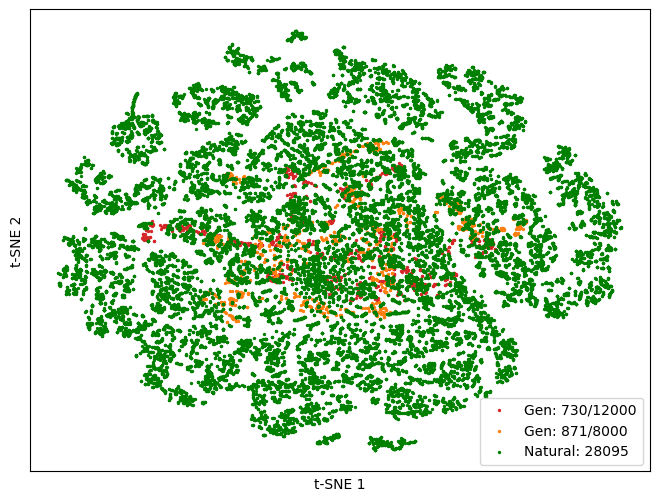

In [8]:
#Read feature embedded numpy file :
feature_path_gen_12000="/home/perm/ProteinGAN/data/embed_features/gen_fz_12000.npz"
feature_path_gen_8000="/home/perm/ProteinGAN/data/embed_features/gen_fz_8000.npz"
feature_path_nat="/home/perm/ProteinGAN/data/embed_features/nat.npz"

features_gen_12000 = np.load(feature_path_gen_12000)['features']
features_gen_8000 = np.load(feature_path_gen_8000)['features']
features_nat = np.load(feature_path_nat)['features']


print(f"Loaded features Generated shapes: : {features_gen_12000.shape}, {features_gen_8000.shape} ")
print("Loaded natural shape: ",features_nat.shape)
save_fig_path = "/home/perm/cov/model/escape_gan/archives/m2/results/tsne.png"
plot_t_sne(features_gen_8000, features_gen_12000, features_nat, save_fig_path )


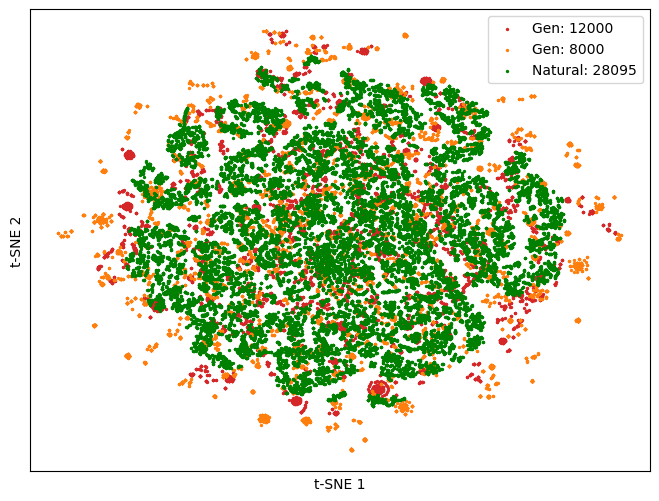

In [10]:
features_gen_full_12000 = np.load("/home/perm/ProteinGAN/data/embed_features/gen_full_12000.npz")['features']
features_gen_full_8000 = np.load("/home/perm/ProteinGAN/data/embed_features/gen_full_8000.npz")['features']
features_nat = np.load(feature_path_nat)['features']

plot_t_sne(features_gen_full_12000, features_gen_full_8000, features_nat, "/home/perm/cov/model/escape_gan/archives/m2/results/tsne_full.png" )

##Trail Method

In [ ]:
# Apply KMeans clustering to the t-SNE embedded data
num_clusters = 4  # Set the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(generated_features)
# Get centroids of the clusters
cluster_centers = kmeans.cluster_centers_
#Natural
kmeans1 = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels1 = kmeans1.fit_predict(natural_features)
# Get centroids of the clusters
cluster_centers1 = kmeans1.cluster_centers_
unique_clusters1, cluster_counts1 = np.unique(cluster_labels1, return_counts=True)
# Plot t-SNE with representative points for clusters (centroid of each cluster)
plt.figure(figsize=(8, 6))
# Count the number of elements in each cluster
unique_clusters, cluster_counts = np.unique(cluster_labels, return_counts=True)

plt.scatter(generated_features[:, 0], generated_features[:, 1],  s=2, c = '#d62728',  cmap='viridis', label="Gen: 730/12000")
plt.scatter(natural_features[: , 0], natural_features[:, 1],  s=2, c='g', cmap='viridis' , label = "Natural: 28095")

for i in range(num_clusters):
    cluster_points = generated_features[cluster_labels == i]
    cluster_center = cluster_centers[i]
    cluster_size = cluster_counts[i]
    
    cluster_size1 = cluster_counts1[i]
    cluster_center1 = cluster_centers1[i]
    if cluster_size <5 :
        cluster_size = 2
    elif cluster_size < 10:
        cluster_size = 4
    elif cluster_size < 15:
        cluster_size = 6
    else:
        cluster_size = 8
    plt.scatter(cluster_center[0], cluster_center[1], c ='blue', s=cluster_size*1, marker='o')
    if cluster_size1 <5 :
        cluster_size1 = 2
    elif cluster_size1 < 10:
        cluster_size1 = 4
    elif cluster_size1 < 15:
        cluster_size1 = 6
    else:
        cluster_size1 = 8
    plt.scatter(cluster_center1[0], cluster_center1[1], c ='orange', s=cluster_size1*1, marker='o')
# plt.title('t-SNE Plot with Representative Points for Clusters')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend()
plt.show()

In [41]:
from Bio import pairwise2
import numpy as np
gen, nat = read_gen_nat_sequeces()
gen_dist_matrix = np.zeros((len(gen), len(gen)))
gen_identity_matrix = np.ones((len(gen), len(gen)))
for i in range(len(gen)):
    for j in range(i + 1, len(gen)):
        alignment = pairwise2.align.globalxx(gen[i], gen[j])
        identity = (alignment[0].score / max(len(gen[i]), len(gen[j]))) * 100
        gen_identity_matrix[i][j] = identity
        gen_dist_matrix[i][j] = hamming_distance
        
        # Calculate Hamming distance between aligned sequences
        hamming_distance = sum(1 for a, b in zip(alignment[0].seqA, alignment[0].seqB) if a != b)
        print(hamming_distance)
        if j == 5:   break
    break
        
        
        
        

print(f"Shape of hamming distance: {np.array(hamming_distance).shape} ")

30
30
28
26
26
[25.0, 25.0, 30.0, 35.0, 35.0]
Shape of hamming distance: () 
